## Problem statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.

**Customer behaviour during churn**:

- Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

- **The ‘good’ phase**: In this phase, the customer is happy with the service and behaves as usual.

- **The ‘action’ phase**: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

- **The ‘churn’ phase**: In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

In [455]:
##import libraries


#To handle data in the form of rows and columns
import pandas as pd

#import numerical libraries
import numpy as np 

#To import seaborn for statistical plots
import seaborn as sns

#To import plotting libraries
import matplotlib.pyplot as plt


#Import Linear Regression machine learning libraries
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA


from datetime import datetime
import  warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [321]:
# Reading the dataset
train = pd.read_csv('/Users/skundra/Desktop/AI ML Datasets/Telecom_train.csv', low_memory=False)
unseen = pd.read_csv('/Users/skundra/Desktop/AI ML Datasets/Telecom_test.csv', low_memory=False)


In [322]:
print("Dimension of the training dataset is", train.shape)
print("Dimension of the unseen dataset is", unseen.shape)
## print("Dimension of the sample dataset is", sample.shape)
## print("Dimension of the data dictionary is", data_dict.shape)

Dimension of the training dataset is (69999, 172)
Dimension of the unseen dataset is (30000, 171)


In [323]:
# Inspecting the train dataset
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [324]:
# Statistics summary of the train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.0,17499.5,34999.0,52498.5,69998.00
circle_id,69999.0,109.000000,0.000000,109.0,109.0,109.0,109.0,109.00
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
std_og_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
aon,69999.0,1220.639709,952.426321,180.0,468.0,868.0,1813.0,4337.00
aug_vbc_3g,69999.0,68.108597,269.328659,0.0,0.0,0.0,0.0,12916.22
jul_vbc_3g,69999.0,65.935830,267.899034,0.0,0.0,0.0,0.0,9165.60
jun_vbc_3g,69999.0,60.076740,257.226810,0.0,0.0,0.0,0.0,11166.21


In [325]:
# Creating the copy of the original training set
telecom_df = train.copy()

In [326]:
# Creating the copy of the original test set
telecom_test_df = unseen.copy()

#2. Data Cleaning and Preparation
2.1. Checking the columns with single unique value

In [327]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((telecom_df.isnull().sum()/len(telecom_df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [328]:
cols_with_single_value = []
for col in train.columns:
    if train[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [329]:
# Inspecting circle id
for col in cols_with_single_value:
    print(col)
    print(train[col].value_counts(dropna=False))
    print("-----------------------------")

circle_id
circle_id
109    69999
Name: count, dtype: int64
-----------------------------
loc_og_t2o_mou
loc_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
-----------------------------
std_og_t2o_mou
std_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
-----------------------------
loc_ic_t2o_mou
loc_ic_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64
-----------------------------
last_date_of_month_6
last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64
-----------------------------
last_date_of_month_7
last_date_of_month_7
7/31/2014    69600
NaN            399
Name: count, dtype: int64
-----------------------------
last_date_of_month_8
last_date_of_month_8
8/31/2014    69266
NaN            733
Name: count, dtype: int64
-----------------------------
std_og_t2c_mou_6
std_og_t2c_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64
-----------------------------
std_og_t2c_mou_7
std_og_t2c_mou_7
0.0    67312
NaN     2687
Name: coun

In [330]:
# Based on the dataset, we remove these columns from the training set
train.drop(cols_with_single_value, axis=1, inplace=True)

# Based on the dataset, we remove these columns from the test set
unseen.drop(cols_with_single_value, axis=1, inplace=True)

In [331]:
# Remove the id column since it is unique for every row from the training set
train.drop('id', axis=1, inplace=True)

In [332]:
# List the date columns
date_cols = [k for k in telecom_df.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [333]:
# Generating a list of column names based on their corresponding types

date_cols = ['date_of_last_rech_6',
            'date_of_last_rech_7',
            'date_of_last_rech_8',
            'date_of_last_rech_data_6',
            'date_of_last_rech_data_7',
            'date_of_last_rech_data_8',
            ]

cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
           ]

numerical_cols = [col for col in train.columns if col not in date_cols + cat_cols]

In [334]:
# Dropping date columns as they are not useful for our analysis from the training set
train.drop(columns=date_cols, axis=1, inplace=True)

# Dropping date columns as they are not useful for our analysis from the test set
unseen.drop(columns=date_cols, axis=1, inplace=True)

In [335]:

### Check for columns with more than 70% missing values in the training dataset
mv_train_set = round(100*(train.isna().sum(axis=0)/train.shape[0]), 2)
mv_train_set[mv_train_set > 70].sort_values(ascending=False)

total_rech_data_6     74.90
arpu_3g_6             74.90
max_rech_data_6       74.90
fb_user_6             74.90
count_rech_2g_6       74.90
night_pck_user_6      74.90
count_rech_3g_6       74.90
arpu_2g_6             74.90
av_rech_amt_data_6    74.90
fb_user_7             74.48
night_pck_user_7      74.48
arpu_2g_7             74.48
arpu_3g_7             74.48
av_rech_amt_data_7    74.48
total_rech_data_7     74.48
count_rech_3g_7       74.48
count_rech_2g_7       74.48
max_rech_data_7       74.48
av_rech_amt_data_8    73.69
count_rech_3g_8       73.69
arpu_3g_8             73.69
count_rech_2g_8       73.69
arpu_2g_8             73.69
max_rech_data_8       73.69
night_pck_user_8      73.69
total_rech_data_8     73.69
fb_user_8             73.69
dtype: float64

In [336]:

# List the columns having more than 30% missing values
col_list_missing_30 = list(df_missing_columns.index[df_missing_columns['null'] > 30])

In [337]:
# Delete the columns having more than 30% missing values
telecom_df = telecom_df.drop(col_list_missing_30, axis=1)

In [338]:
# Drop circle_id column
telecom_df = telecom_df.drop('circle_id', axis=1)

In [339]:
telecom_df.shape

(69999, 141)

In [340]:
# Columns with recharge information 
recharge_cols = train.columns[train.columns.str.contains('_rech_')]
print(recharge_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


In [341]:
# Replacing NaN values in recharge related columns with 0 in the training set
train[recharge_cols] = train[recharge_cols].fillna(0)
print(train[recharge_cols].isnull().sum()*100/train.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [342]:
# Replacing NaN values in recharge related columns with 0 in the test set
unseen[recharge_cols] = unseen[recharge_cols].fillna(0)
print(unseen[recharge_cols].isnull().sum()*100/unseen.shape[1])

total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


In [343]:
# Columns with 'arpu' information 
#Arpu = Average Revenue per user
arpu_cols = train.columns[train.columns.str.contains('arpu_')]
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')


In [344]:
# Replacing NaN values in ARPU related columns with 0 in the training set
#Arpu = Average Revenue per user
train[arpu_cols] = train[arpu_cols].fillna(0)
print(train[arpu_cols].isnull().sum()*100/train.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [345]:
# Replacing NaN values in ARPU related columns with 0 in the test set
#Arpu = Average Revenue per user
unseen[arpu_cols] = unseen[arpu_cols].fillna(0)
print(unseen[arpu_cols].isnull().sum()*100/unseen.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [346]:
# Inspecting categorical columns
train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  17568 non-null  float64
 1   night_pck_user_7  17865 non-null  float64
 2   night_pck_user_8  18417 non-null  float64
 3   fb_user_6         17568 non-null  float64
 4   fb_user_7         17865 non-null  float64
 5   fb_user_8         18417 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


## 2.2. Imputing missing values in Categorical Columns
Imputing missing categorical values with a value of -1 facilitates the preservation and identification of missing data while ensuring compatibility with analysis algorithms and maintaining consistency in data encoding.

In [347]:
# Replacing NaN values in categorical related columns with -1 in the training set.
# We noticed that the columns listed in `cat_cols` are of the `float64` data type.
# We'll need to convert them to the `category` data type.
train[cat_cols] = train[cat_cols].fillna(-1).astype('category')
print(train[cat_cols].isnull().sum()*100/train.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [348]:
# Verifying the change in dtype on the train set
train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  69999 non-null  category
 1   night_pck_user_7  69999 non-null  category
 2   night_pck_user_8  69999 non-null  category
 3   fb_user_6         69999 non-null  category
 4   fb_user_7         69999 non-null  category
 5   fb_user_8         69999 non-null  category
dtypes: category(6)
memory usage: 411.1 KB


In [349]:
# Replacing NaN values in categorical related columns with -1 in the test set.
# We noticed that the columns listed in `cat_cols` are of the `float64` data type.
# We'll need to convert them to the `category` data type.
unseen[cat_cols] = unseen[cat_cols].fillna(-1).astype('category')
print(unseen[cat_cols].isnull().sum()*100/unseen.shape[1])

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
dtype: float64


In [350]:
# Verifying the change in dtype on the test set
unseen[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   night_pck_user_6  30000 non-null  category
 1   night_pck_user_7  30000 non-null  category
 2   night_pck_user_8  30000 non-null  category
 3   fb_user_6         30000 non-null  category
 4   fb_user_7         30000 non-null  category
 5   fb_user_8         30000 non-null  category
dtypes: category(6)
memory usage: 176.7 KB


In [351]:
# Checking for the columns which have missing values present
mv_train_set[(mv_train_set > 0) & (mv_train_set <= 70)].sort_values(ascending=False)

ic_others_8         5.29
loc_og_t2m_mou_8    5.29
std_og_mou_8        5.29
spl_og_mou_8        5.29
std_og_t2f_mou_8    5.29
                    ... 
std_og_t2f_mou_7    3.84
og_others_7         3.84
std_og_mou_7        3.84
spl_og_mou_7        3.84
isd_og_mou_7        3.84
Length: 81, dtype: float64

In [352]:
# Creating a list containing these columns to be processed later for imputation using the KNN technique.
missing_values_list = mv_train_set[(mv_train_set > 0) & (mv_train_set <= 70)].index
print(missing_values_list)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

## 2.3. Deriving New Features
Filtering only High Value Customers
In this segment, we'll identify **high-value customers** aligning with our business objectives, focusing solely on prepaid customers experiencing usage-based churn. We'll evaluate the recharge amounts for **June and July**, selecting only the top 70% of customers as high-value.

We can create a new feature named Total Data Recharge Amount by multiplying the values of total_rech_data and av_rech_amt_data, which represents the amount recharged by the customer for data usage.

- **Total Data Recharge Amount = Total Data Recharge * Average Data Recharge Amount**
Created another column for total recharge done Total Amount for the months 6 and 7.

- **Total Amount = Total Data Recharge Amount + Total Recharge Amount**
Additionally, we can compute the Total Average Recharge Amount during the 'Good Phase', which includes months 6 and 7.

- **Total Average Amount = (Total Data Recharge Amount + Total Recharge Amount) / 2**

In [353]:
# Deriving new columns for Total Data Recharge Amount for the 'Good Phase' in the training set
train['total_rech_data_amt_6'] = train['total_rech_data_6'] * train['av_rech_amt_data_6']
train['total_rech_data_amt_7'] = train['total_rech_data_7'] * train['av_rech_amt_data_7']

train['total_amt_6'] = train['total_rech_data_amt_6'] + train['total_rech_amt_6']
train['total_amt_7'] = train['total_rech_data_amt_7'] + train['total_rech_amt_7']

train['total_avg_amt_6_7'] = train[['total_amt_6', 'total_amt_7']].mean(axis=1)

In [354]:
# Dropping the columns as they are not so useful columns for high value customer or churn

drop_data_cols = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',]

train.drop(drop_data_cols, axis=1, inplace=True)

In [355]:
# Deriving new columns for Total Data Recharge Amount for the 'Good Phase' in the test set
unseen['total_rech_data_amt_6'] = unseen['total_rech_data_6'] * unseen['av_rech_amt_data_6']
unseen['total_rech_data_amt_7'] = unseen['total_rech_data_7'] * unseen['av_rech_amt_data_7']

unseen['total_amt_6'] = unseen['total_rech_data_amt_6'] + unseen['total_rech_amt_6']
unseen['total_amt_7'] = unseen['total_rech_data_amt_7'] + unseen['total_rech_amt_7']

unseen['total_avg_amt_6_7'] = unseen[['total_amt_6', 'total_amt_7']].mean(axis=1)

# Dropping the drop_data_cols from the test set
unseen.drop(drop_data_cols, axis=1, inplace=True)

In [356]:
# Checking for any null value in the derived column in the training set
train['total_avg_amt_6_7'].isnull().sum()

np.int64(0)

In [357]:
# Checking for any null value in the derived column in the test set
unseen['total_avg_amt_6_7'].isnull().sum()

np.int64(0)

**Deriving a new column decrease_rech_num_action**

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [358]:
# Avg rech number at action phase
train['avg_rech_num_action'] = (train['total_rech_num_7'] + train['total_rech_num_8'])/2

In [359]:
# Difference total_rech_num_6 and avg_rech_action
train['diff_rech_num'] = train['avg_rech_num_action'] - train['total_rech_num_6']

In [360]:
# Checking if rech_num has decreased in action phase
train['decrease_rech_num_action'] = np.where((train['diff_rech_num'] < 0), 1, 0)

In [361]:
train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_avg_amt_6_7,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0.0,0.0,0.0,0,77.0,65.0,71.0,2.0,-1.0,1
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0.0,0.0,0.0,0,0.0,290.0,145.0,4.5,1.5,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0.0,0.0,0.0,0,70.0,120.0,95.0,3.0,1.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0.0,0.0,0.0,0,160.0,240.0,200.0,3.5,1.5,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0.0,0.0,0.0,0,1515.0,1473.0,1494.0,9.0,-4.0,1


In [362]:
train.shape

(69999, 152)

**Deriving a new column decrease_mou_action8**

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [363]:
# Total mou at good phase incoming and outgoing
train['total_mou_good'] = (train['total_og_mou_6'] + train['total_ic_mou_6'])

In [364]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
train['avg_mou_action'] = (train['total_og_mou_7'] + train['total_og_mou_8'] + train['total_ic_mou_7'] + train['total_ic_mou_8'])/2

In [365]:
# Difference avg_mou_good and avg_mou_action
train['diff_mou'] = train['avg_mou_action'] - train['total_mou_good']

In [366]:
# Checking whether the mou has decreased in action phase
train['decrease_mou_action'] = np.where((train['diff_mou'] < 0), 1, 0)

In [367]:
train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_amt_6,total_amt_7,total_avg_amt_6_7,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,77.0,65.0,71.0,2.0,-1.0,1,93.05,159.455,66.405,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0.0,290.0,145.0,4.5,1.5,0,3.44,63.435,59.995,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,70.0,120.0,95.0,3.0,1.0,0,180.78,84.915,-95.865,1
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,160.0,240.0,200.0,3.5,1.5,0,171.14,141.920,-29.220,1
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,1515.0,1473.0,1494.0,9.0,-4.0,1,84.80,48.185,-36.615,1


In [368]:
unseen.shape

(30000, 149)

**Cut off for only High Value Customers**

In [369]:
# Finding cutoff value for only top 70% of high value customers
cutoff = train['total_avg_amt_6_7'].quantile(0.7)
cutoff

np.float64(477.5)

In [370]:
# Filter high value customers in the new dataframe (high_val_train) where total recharge is more than 477.5
high_val_train = train[(train['total_avg_amt_6_7'] > cutoff)].copy()

print(high_val_train.shape)


(20998, 156)


## Common Utilities

In [371]:
def plot_bar_graph(title, month, y_list, data):
    """
    Plot bar graphs for given data.

    Parameters:
    - title (str): Title of the plot.
    - month (list of str): List of month names.
    - y_list (list of str): List of y-variable names corresponding to each month.
    - data (DataFrame): DataFrame containing the data to be plotted.

    Returns:
    - None

    This function plots bar graphs for each month's data based on the provided y-variables.
    It creates subplots for each month, with the corresponding y-variable plotted against 'churn_probability'.
    The title of each subplot includes the specified title along with the month name.
    """
    plt.figure(figsize=(15, 10))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()

In [372]:
def outlier_handling(dataframe):
    """
    Applies outlier handling transformations to the values in the given DataFrame.

    Parameters:
    - dataframe (DataFrame): The DataFrame containing the values to be transformed.

    Returns:
    - transformed_values (list): A list containing the transformed values based on the specified conditions.
    """

    transformed_values = []
    for value in dataframe:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values

In [373]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [374]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = roc_curve(actual, probs,drop_intermediate = False)
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

## 2.4. Analysing our target variable churn_probability and Class Imbalance

In [ ]:
high_val_train['churn_probability'].dtype

In [ ]:
high_val_train['churn_probability'] = high_val_train['churn_probability'].astype('category')

In [ ]:
# Verify the new dtype
high_val_train['churn_probability'].dtype

In [ ]:
# Check the value counts of churn and not-churn
print(high_val_train['churn_probability'].value_counts())

print('-------------------------------------------------')

# Calculate churn ratio
print('Churn ratio:')
print(high_val_train['churn_probability'].value_counts()*100/high_val_train.shape[0])

In [ ]:
# Visualize churn distribution
plt.figure(figsize=(7, 7))
sns.countplot(x = high_val_train['churn_probability'])
plt.xlabel('Customer churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Customer churn distribution', fontsize=18)
plt.show()

In [ ]:
# Create a copy of high_val_train df and use the new df (churn_data) for pruning in the training set
churn_data = high_val_train.copy()
churn_data.reset_index(inplace=True)
churn_data.drop(['index'], axis=1, inplace=True)

In [ ]:
churn_data.shape

In [ ]:
(20998, 149)
# Get the list of columns with missing values in the training set
mv = round(100*(churn_data.isnull().sum(axis=0)/churn_data.shape[0]), 2)
s = mv.loc[mv>0]
impute_cols_num = list(s.index)
len(impute_cols_num)

In [ ]:

# Lets try to verify how many values are missing from the dataframe
drop = high_val_train.dropna()
print(churn_data.shape[0] - drop.shape[0])

## 2.5. Impute missing values using KNN Imputer - Training Set
We cannot discard these missing values because doing so would result in the loss of valuable information. Instead, we will employ imputation techniques such as KNNImputer.

**KNNImputer** is a technique used to impute missing values in a dataset based on the values of its nearest neighbors. It works by identifying the k nearest neighbors of each data point with missing values, then averaging or taking a weighted average of the available values from those neighbors to fill in the missing value. This approach leverages the similarity between data points to estimate the missing values more accurately.

In [ ]:
# Create imputer instance
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Separate df having columns to be imputed
df_num = churn_data[impute_cols_num]
churn_df = churn_data.drop(impute_cols_num, axis=1)

In [ ]:
%%time
# Impute using KNN imputer instance
df_imp = imputer.fit_transform(df_num)

In [ ]:
# Convert it to df post imputation
df_imp = pd.DataFrame(df_imp, columns=impute_cols_num)
df_imp.head()

In [ ]:
# Merge the two dataframes together post imputation to create the final training set
final_df = pd.concat([df_imp, churn_df], join='inner', axis=1)
final_df.head()

In [ ]:
final_df.shape

In [ ]:

# Verify no missing value is present in the training set now
final_df.isnull().sum().sort_values(ascending=False)

 ## 2.6. Impute missing values using the KNN Imputer - Unseen Test Set

In [ ]:
# Separate df having columns to be imputed
df_num_unseen = unseen[impute_cols_num]
churn_df_unseen = unseen.drop(impute_cols_num, axis=1)

In [ ]:
%%time
# Impute using KNN imputer instance
df_imp_unseen = imputer.transform(df_num_unseen)

In [ ]:
# Convert it to df post imputation
df_imp_unseen = pd.DataFrame(df_imp_unseen, columns=impute_cols_num)
df_imp_unseen.head()

In [ ]:
# Merge the two dataframes together post imputation
final_unseen_df = pd.concat([df_imp_unseen, churn_df_unseen], join='inner', axis=1)
final_unseen_df.head()

In [ ]:
final_unseen_df.shape

In [ ]:
# Verify no missing value is present in the test set now
final_unseen_df.isnull().sum().sort_values(ascending=False)


## Exploratory Data Analysis ##

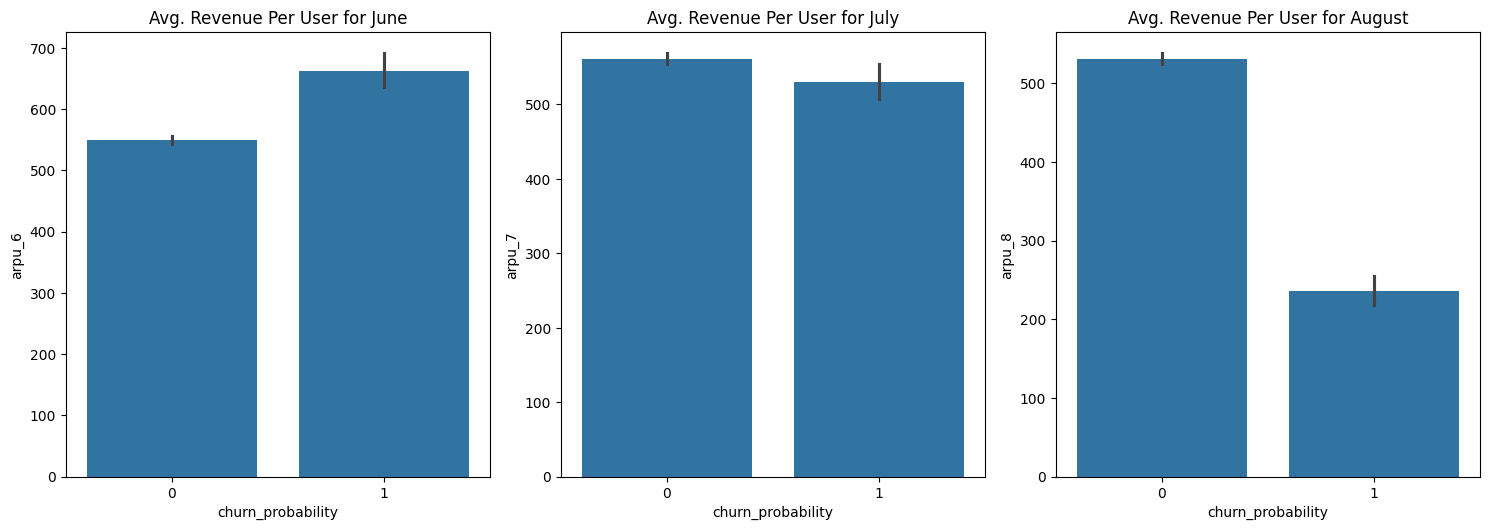

In [377]:
# Visualising Average Revenue per user
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
plot_bar_graph('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols, final_df)

The decline in the Average Revenue Per User (ARPU) in month of August suggests churn.

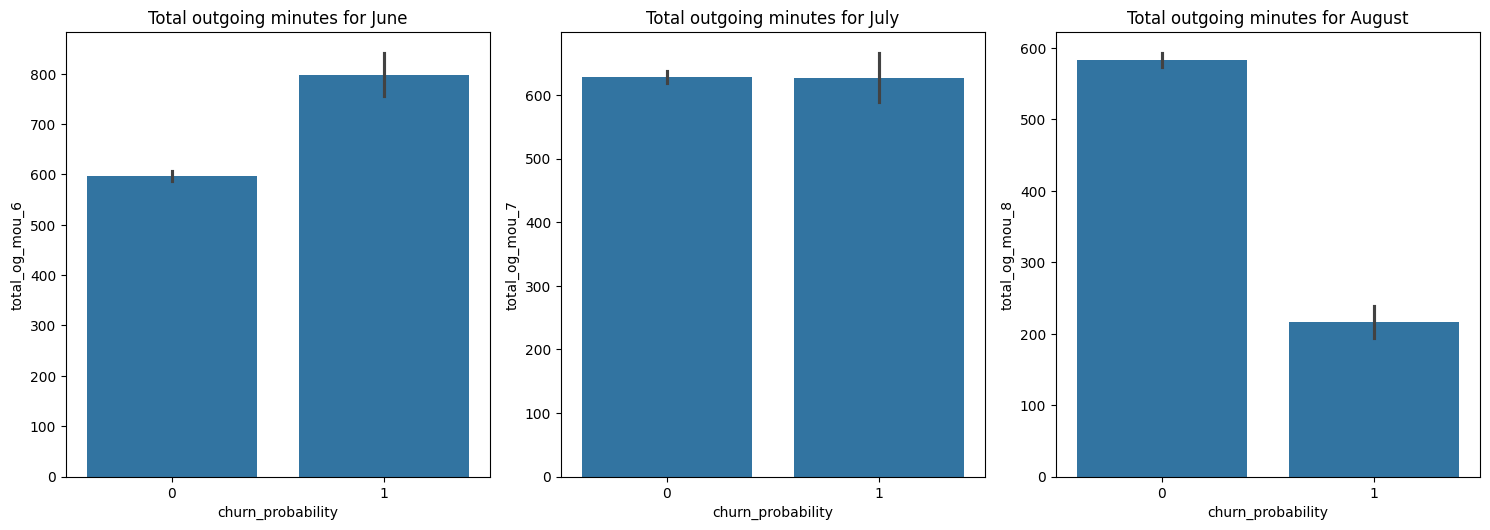

In [378]:
# Visualising Outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, final_df)

The decline in the Total outgoing minutes in month of August suggests churn.

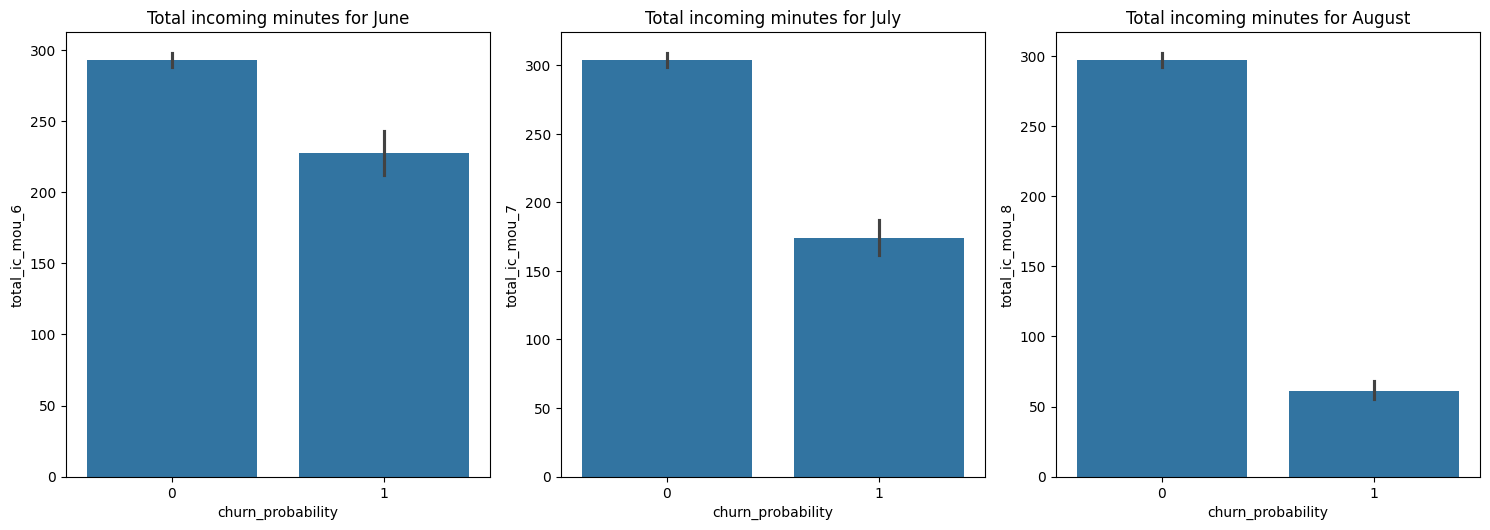

In [379]:
# Visualising incoming minutes of usage
total_ic_mou_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
plot_bar_graph('Total incoming minutes', ['June', 'July', 'August'], total_ic_mou_cols, final_df)

The decline in the Total incoming minutes in month of August suggests churn.

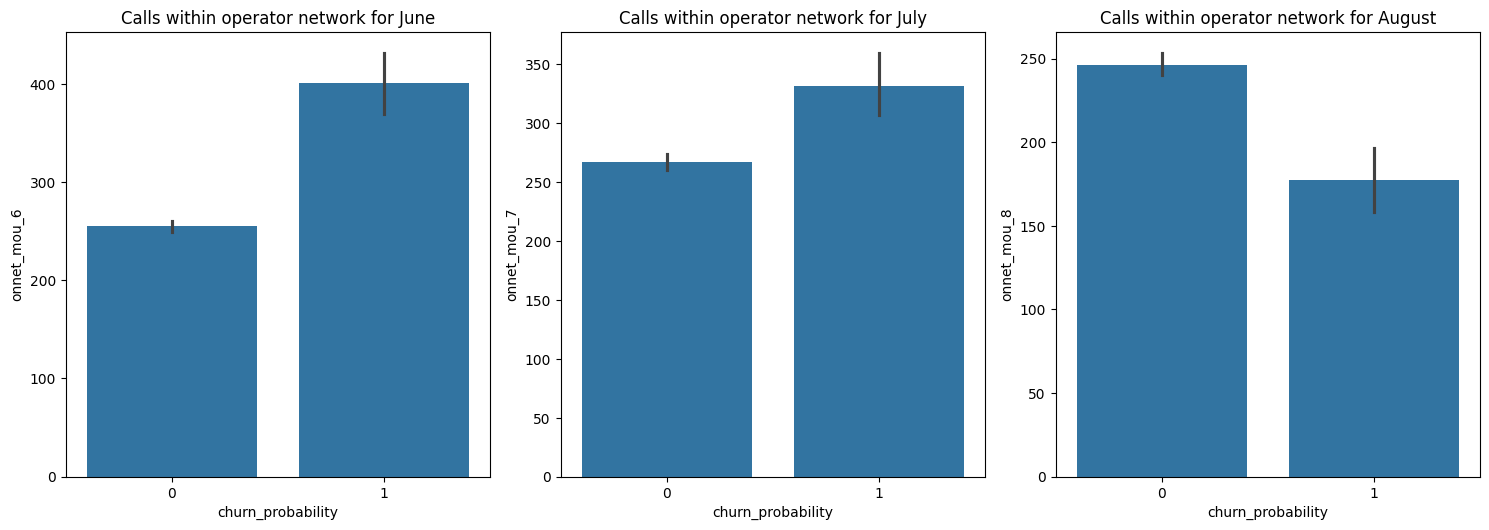

In [380]:
# Visualizing all types of calls within the operator's network.
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, final_df)

The decline in the Calls within operator network in month of August suggests churn.

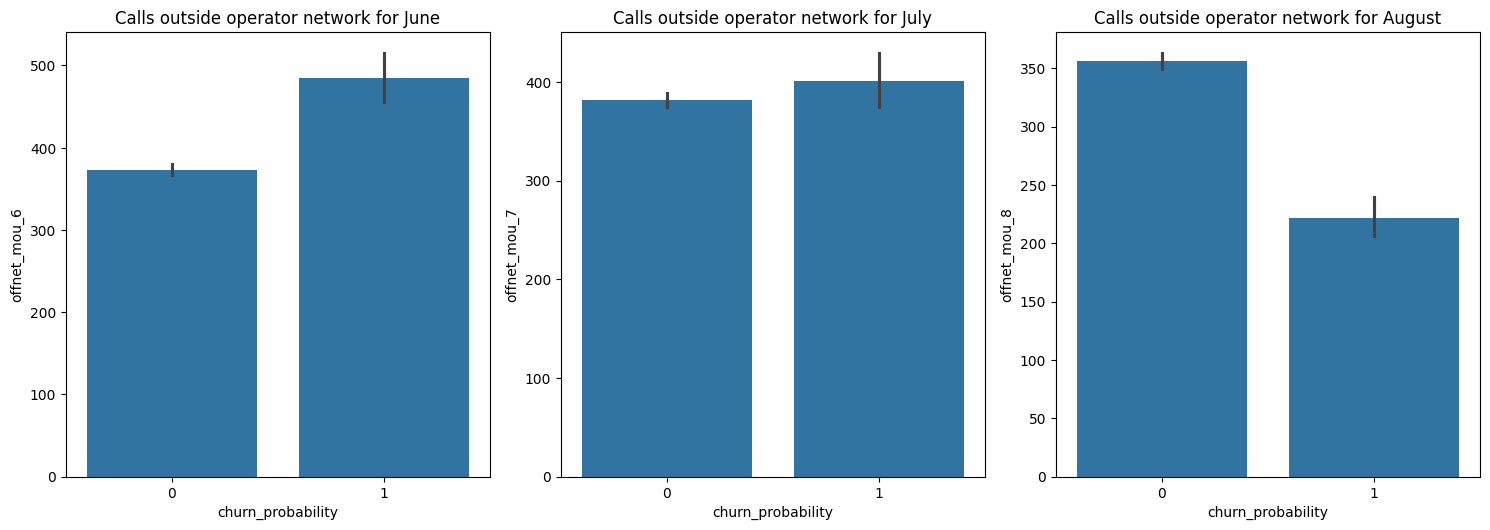

In [381]:
# Visualizing all types of calls made outside the operator network.
offnet_mou_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plot_bar_graph('Calls outside operator network', ['June', 'July', 'August'], offnet_mou_cols, final_df)

The decline in the Calls outside operator network in month of August suggests churn.

In [382]:
# Analysing different metrics by extracting them into columns of similar type
amount_data = final_df.loc[:, final_df.columns.str.contains('amt')]
data2g = final_df.loc[:, final_df.columns.str.contains('2g')]
data3g = final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data = final_df.loc[:, final_df.columns.str.contains('ic') & final_df.columns.str.contains('mou')]
net_mou_data = final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data = final_df.loc[:, final_df.columns.str.contains('og') & final_df.columns.str.contains('mou')]
rech_data = final_df.loc[:, final_df.columns.str.contains('rech')]
total_data = final_df.loc[:, final_df.columns.str.contains('tot')]

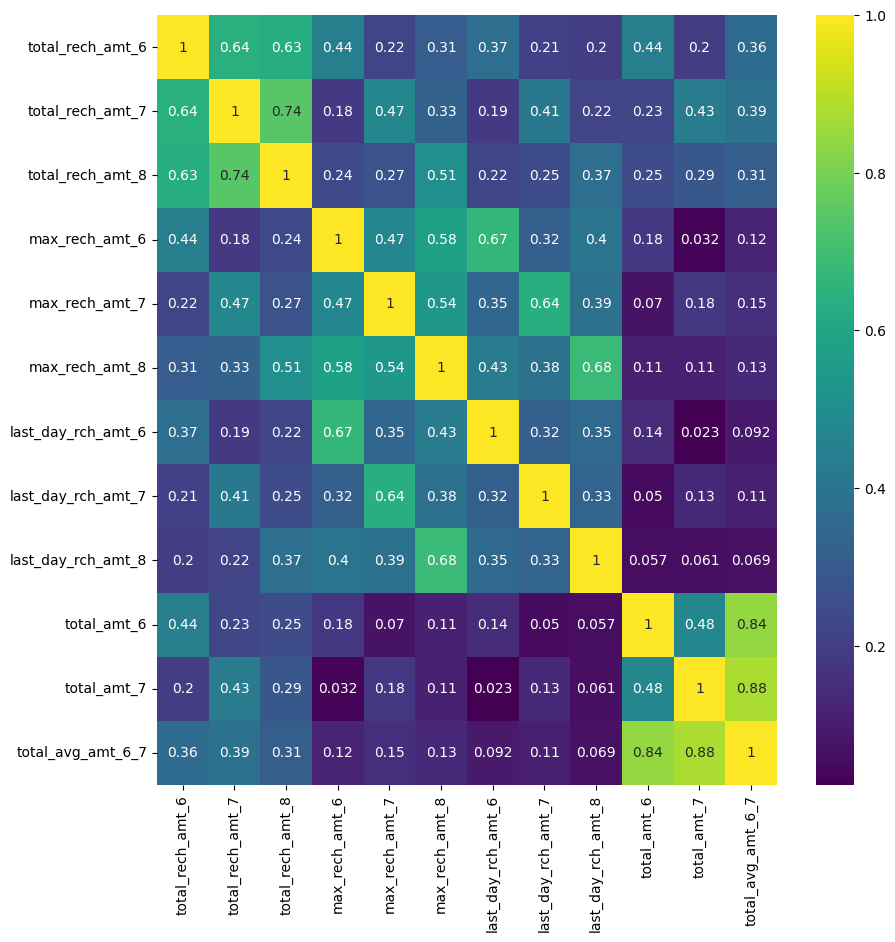

In [383]:
# Amount data
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(), annot=True, cmap='viridis')
plt.show()

Observations:

- A substantial correlation of 74% exists between the total recharge amount in month 7 and month 8.
- Similarly, a notable correlation of 68% is observed between the maximum recharge amount in month 8 and the last day's recharge amount in the same month.
- This suggests that customers who are unlikely to churn tend to recharge higher amounts in month 8.

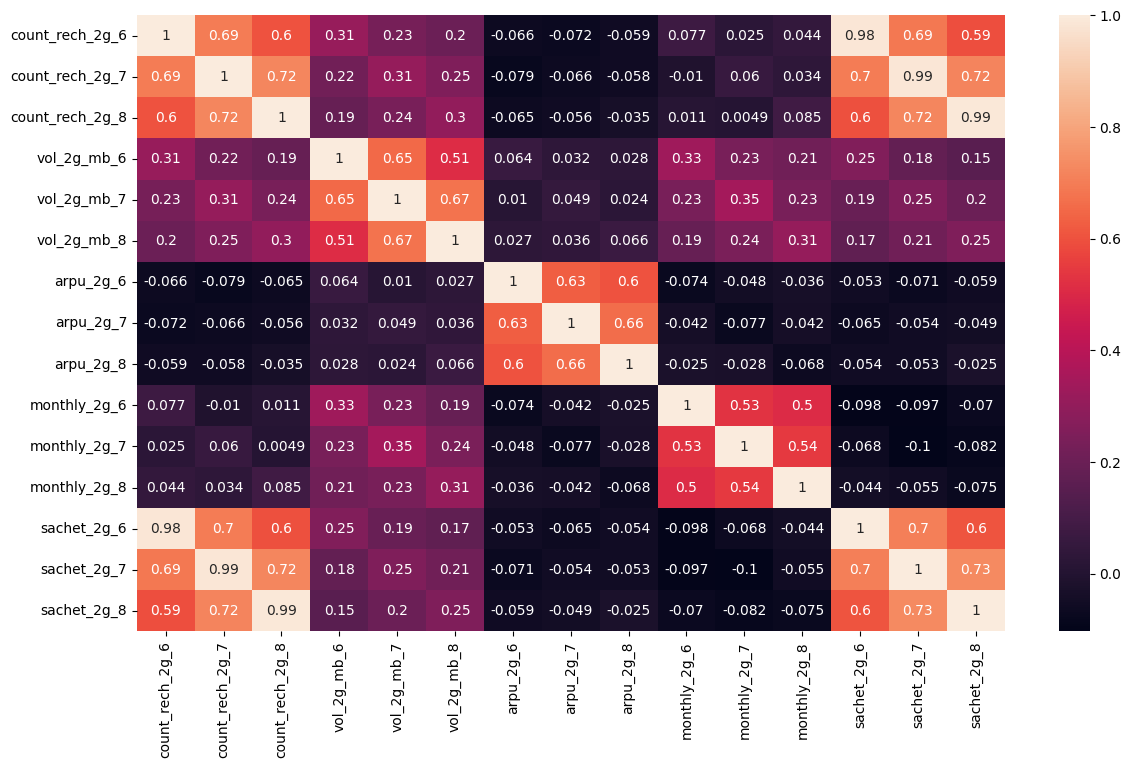

In [384]:
# data2g
plt.figure(figsize=(14,8))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

Observations:

- There is a strong correlation between recharge quantities in months 7 and 8.

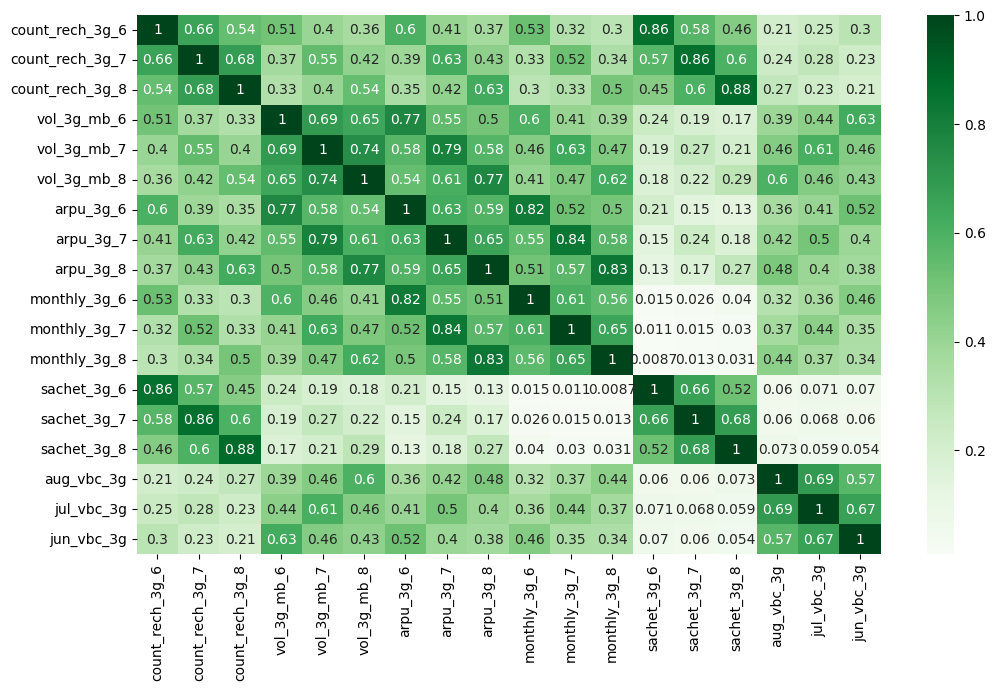

In [385]:
#data3g
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

Observations:

There is a strong correlation between recharge quantities in months 7 and 8.

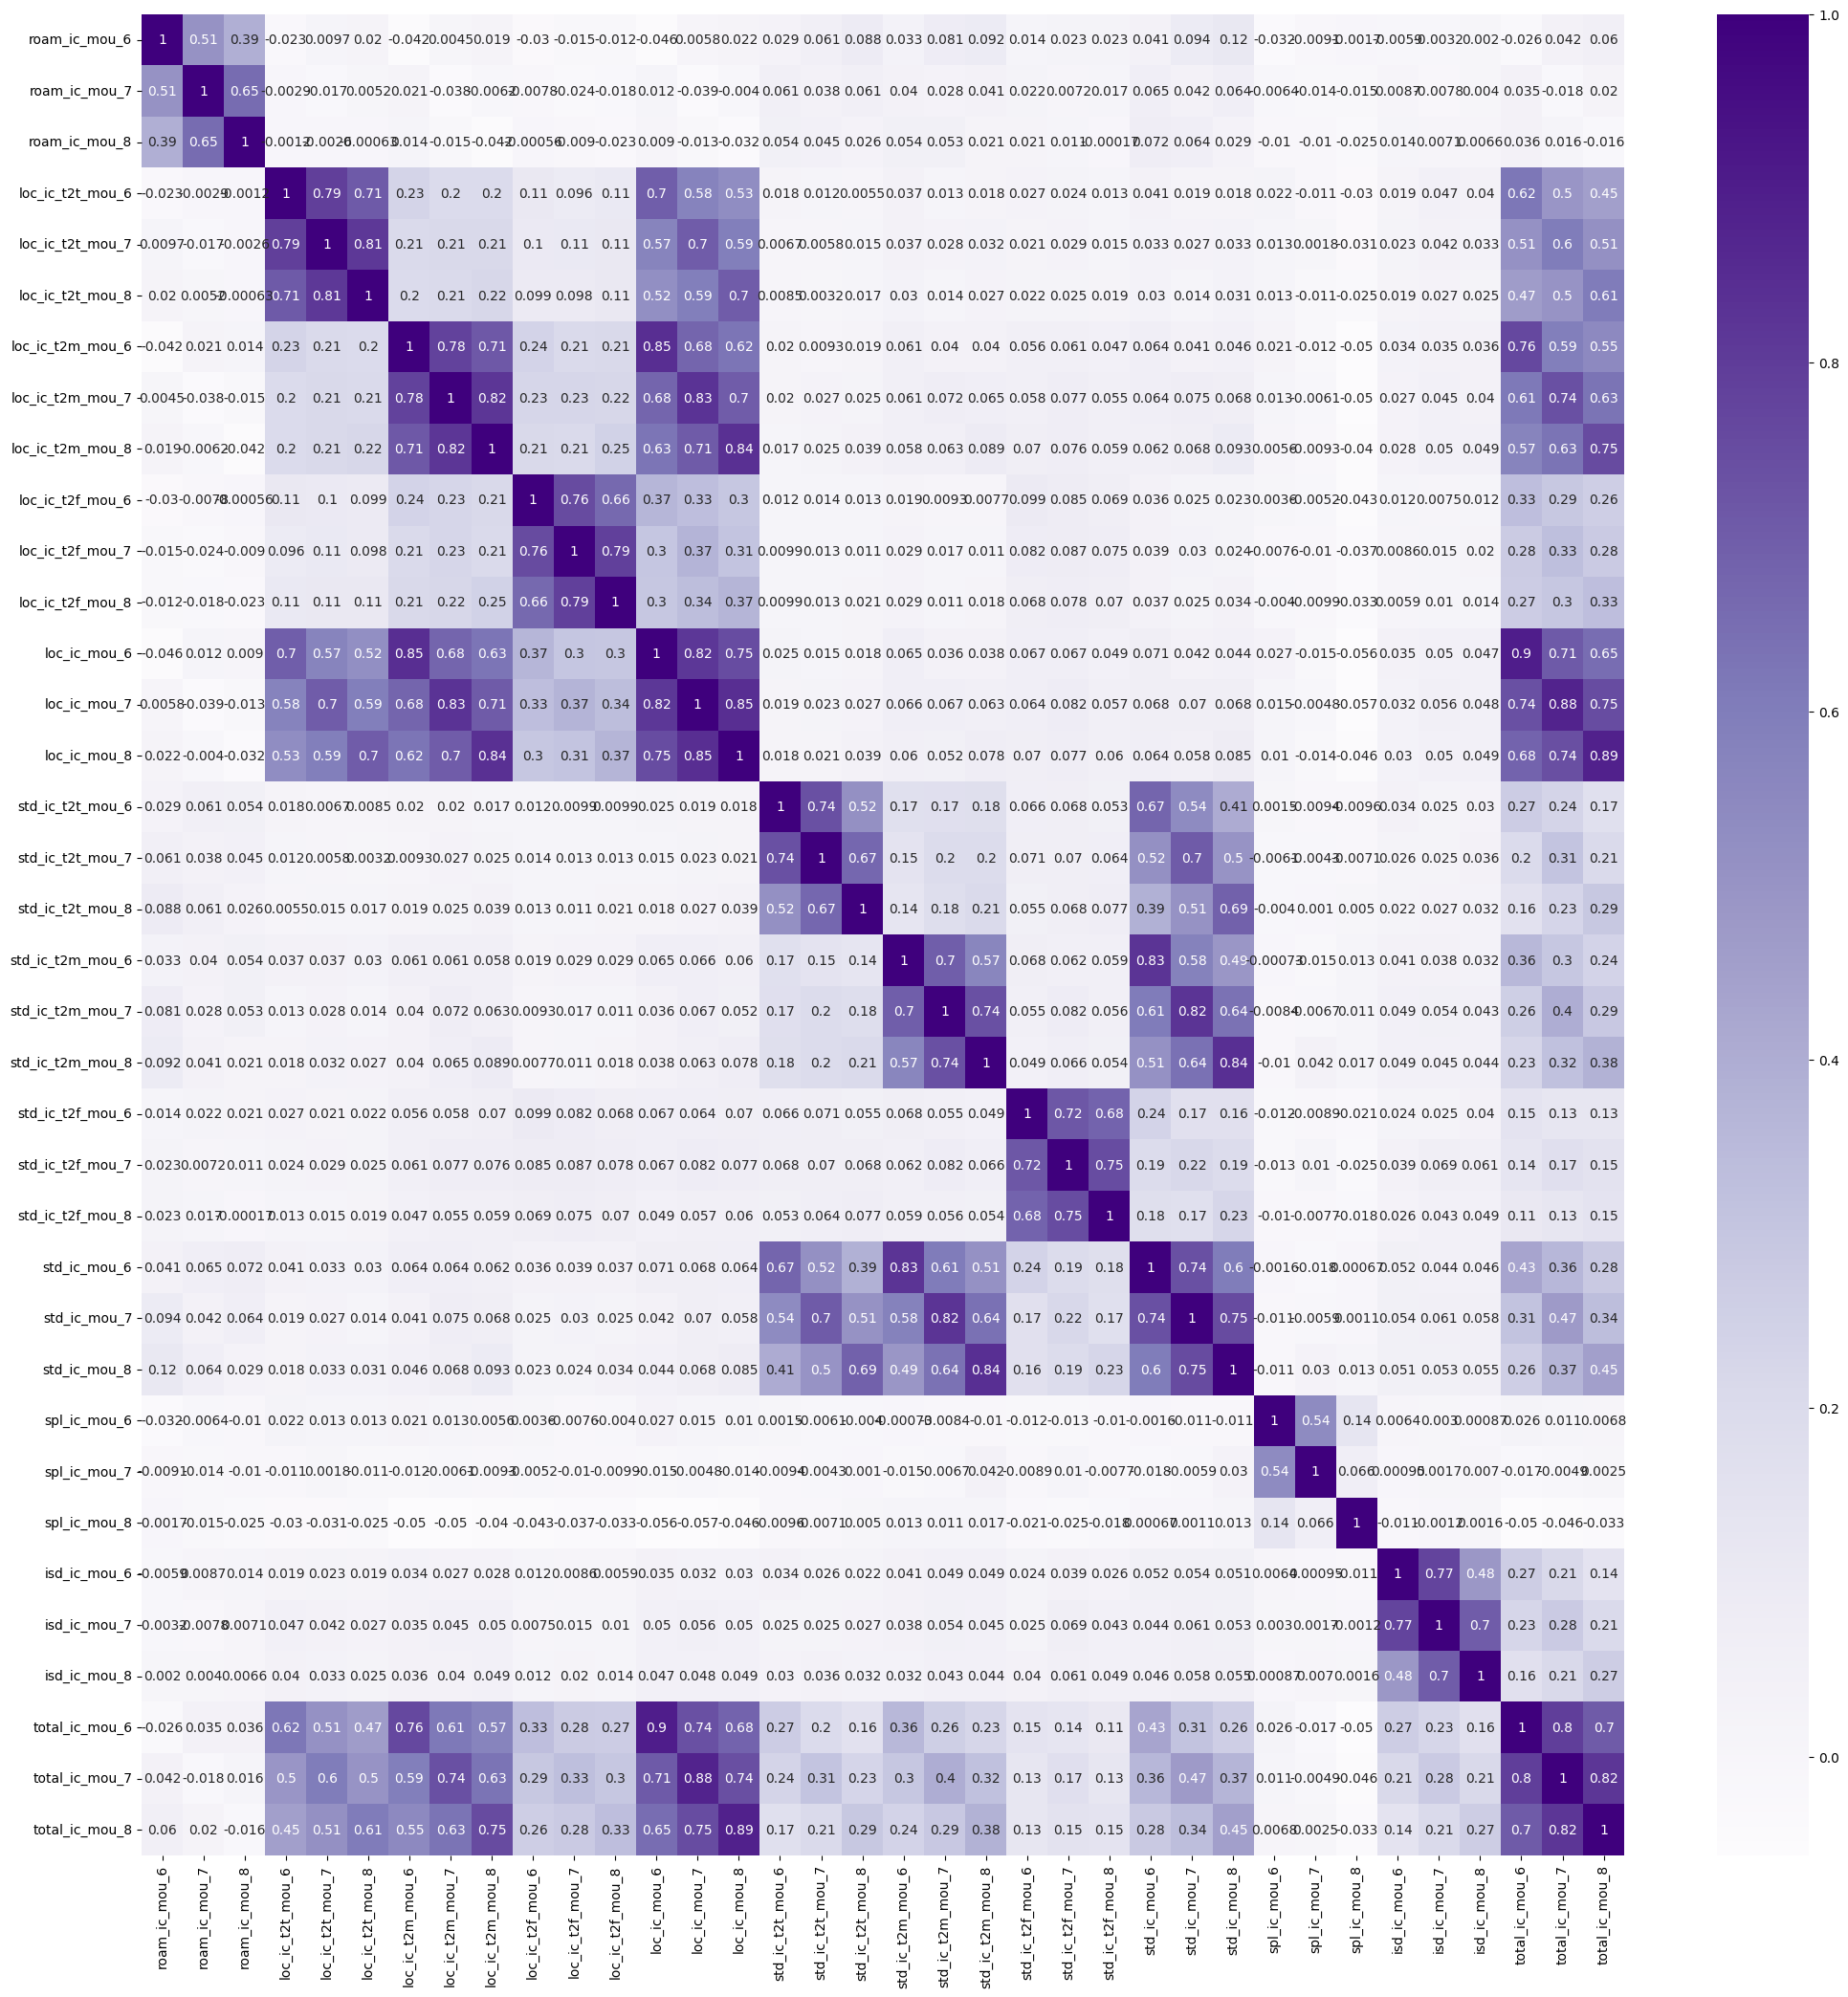

In [386]:
#ic_mou_data
plt.figure(figsize=(25, 25))
sns.heatmap(ic_mou_data.corr(), annot=True, cmap='Purples')
plt.show()

Observations:

The following variables or features exhibit a remarkably high correlation:

- total_ic_mou_6 and loc_ic_mou_6
- total_ic_mou_7 and loc_ic_mou_7
- total_ic_mou_8 and loc_ic_mou_8
- std_ic_mou_6 and std_ic_t2f_mou_6
- std_ic_mou_7 and std_ic_t2f_mou_7
- std_ic_mou_8 and std_ic_t2f_mou_8

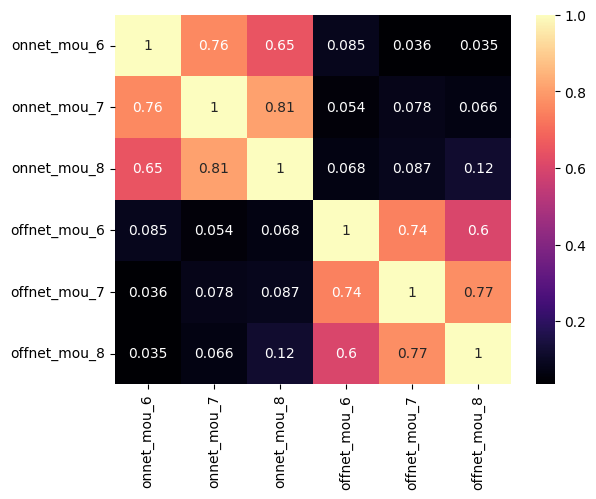

In [387]:
#net_mou_data
sns.heatmap(net_mou_data.corr(), annot=True, cmap='magma')
plt.show()

Observations:

- There is no correlation between the usage minutes for on-net and off-net calls.
- However, a significant correlation is observed between the on-net and off-net usage minutes in both months 7 and 8.

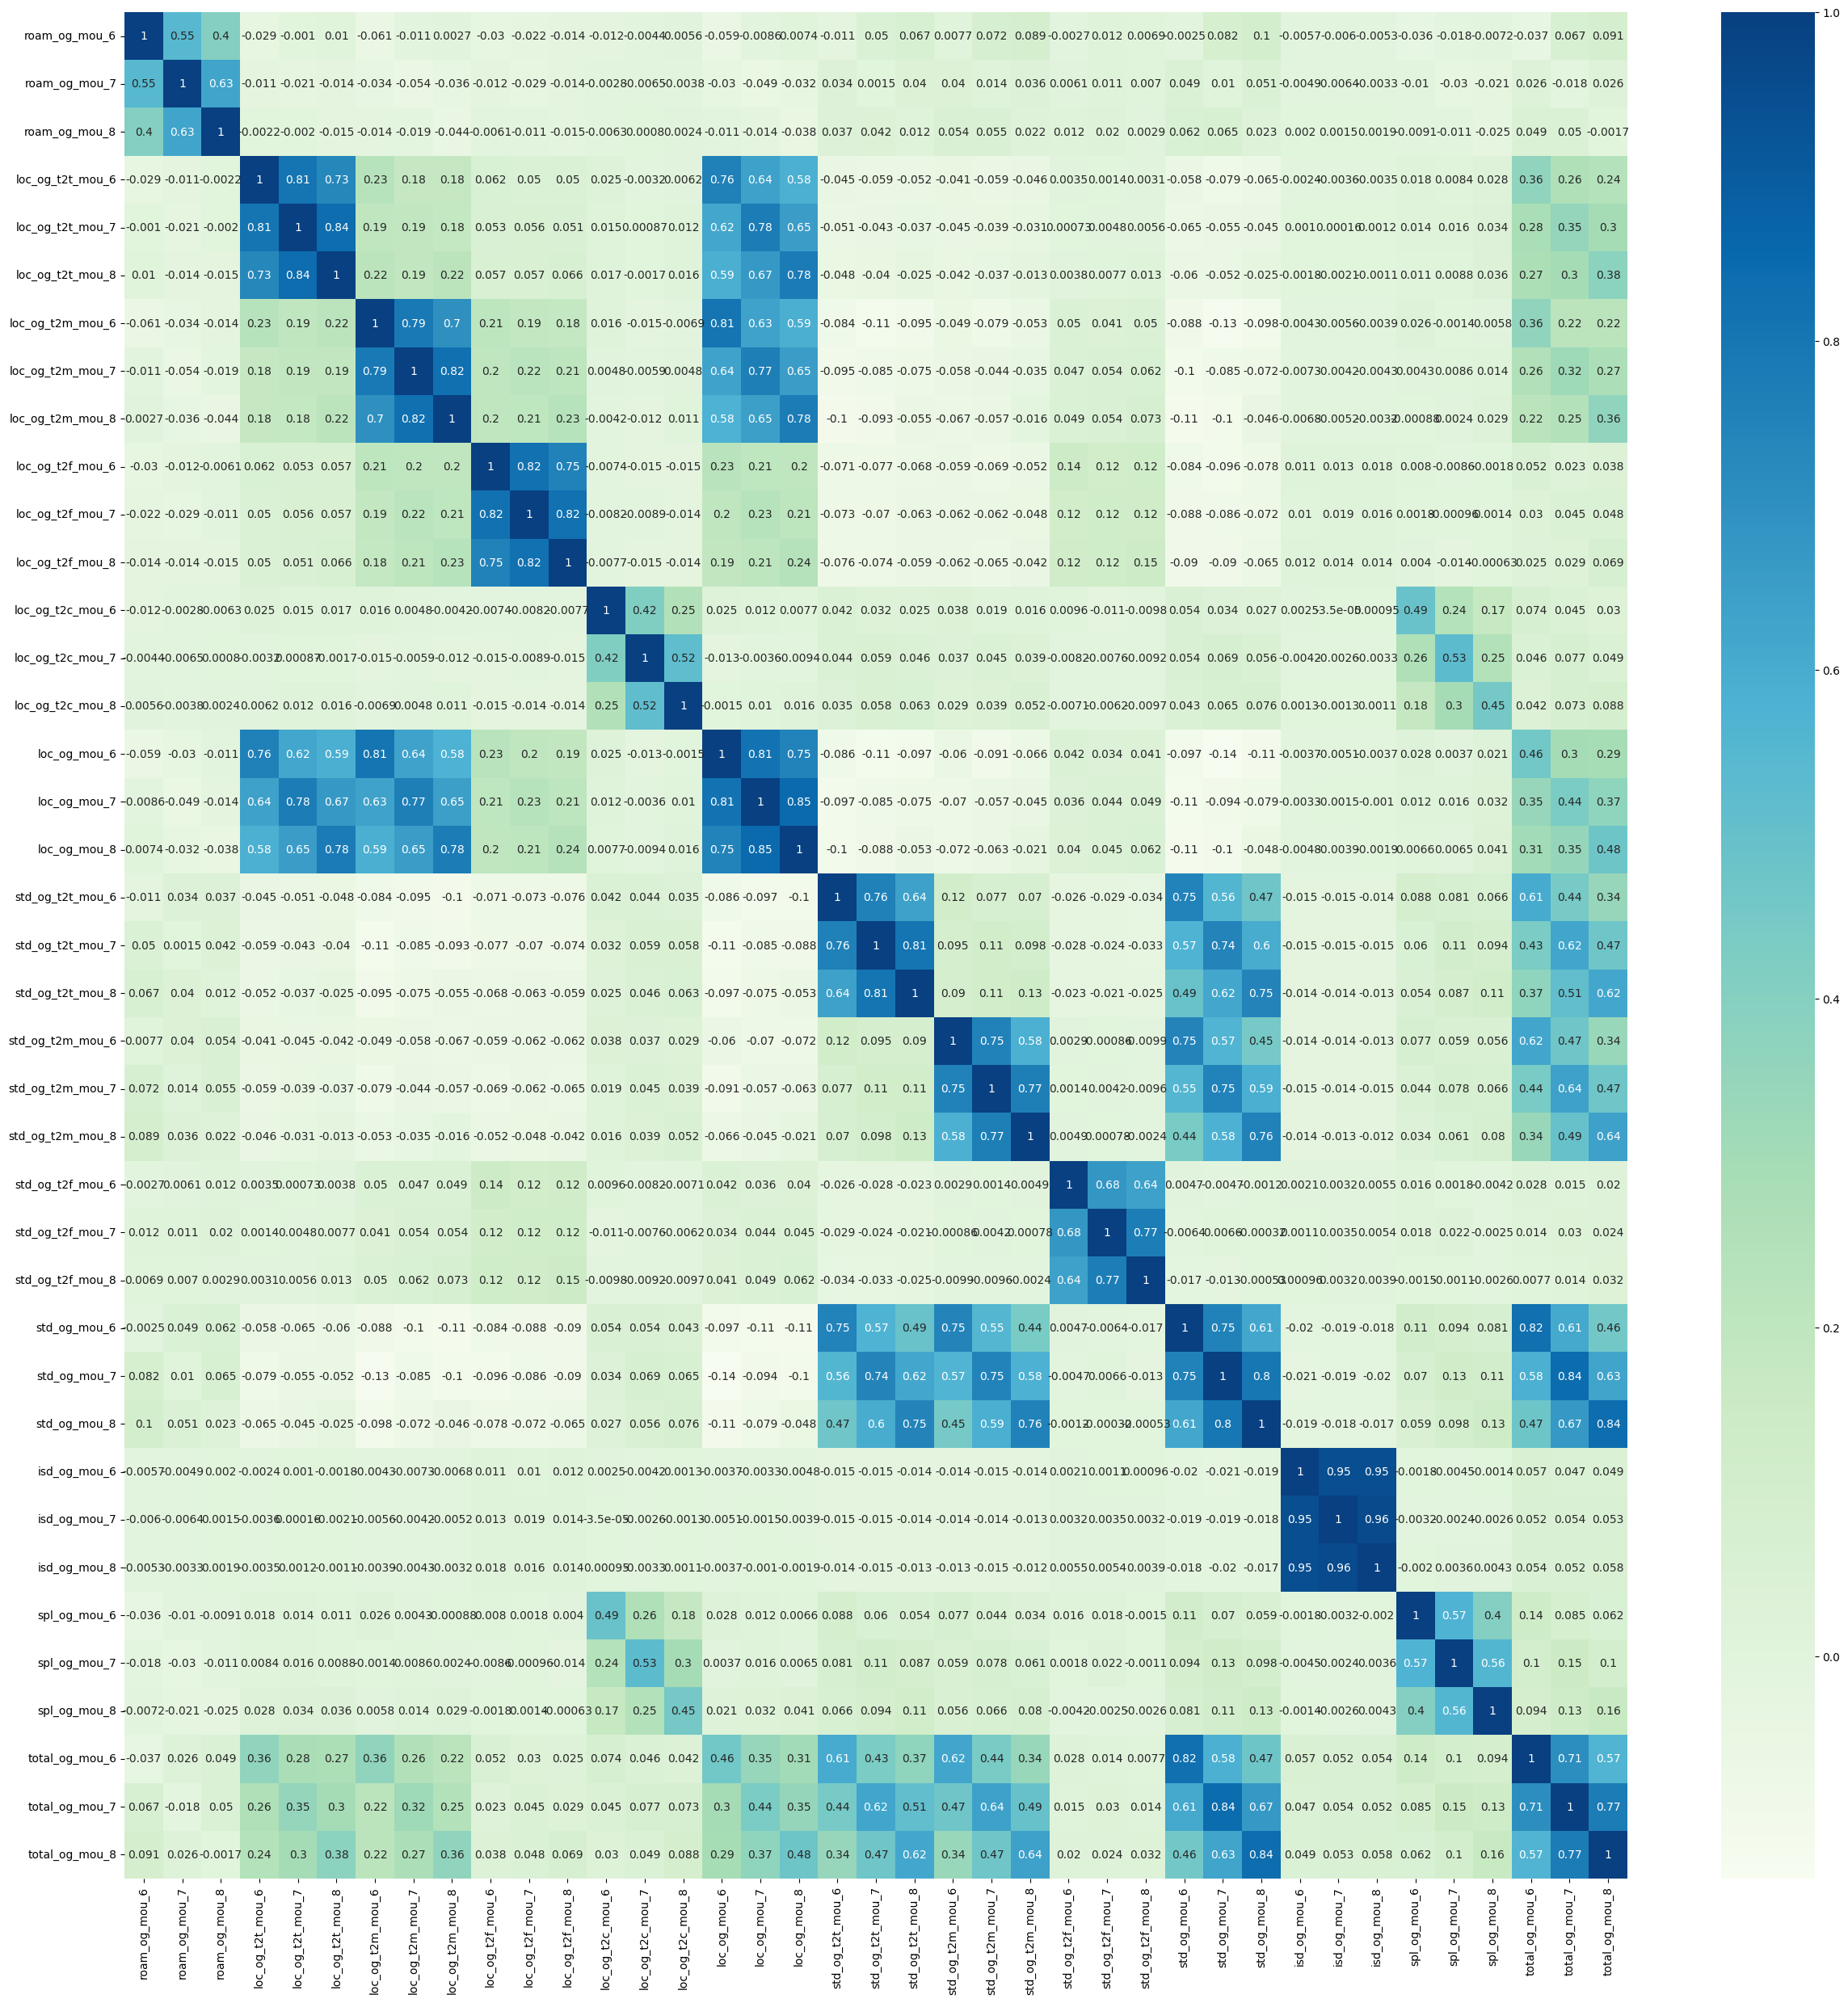

In [388]:
#og_mou_data
plt.figure(figsize=(30,30))
sns.heatmap(og_mou_data.corr(), annot=True, cmap='GnBu')
plt.show()

Observations:

There exists a very high correlation between the following variables/features:
- isd_og_mou_7 and isd_og_mou_6
- isd_og_mou_8 and isd_og_mou_6
- isd_og_mou_8 and isd_og_mou_7
- total_og_mou_6 and std_og_mou_6
- total_og_mou_7 and std_og_mou_7
- total_og_mou_8 and std_og_mou_8

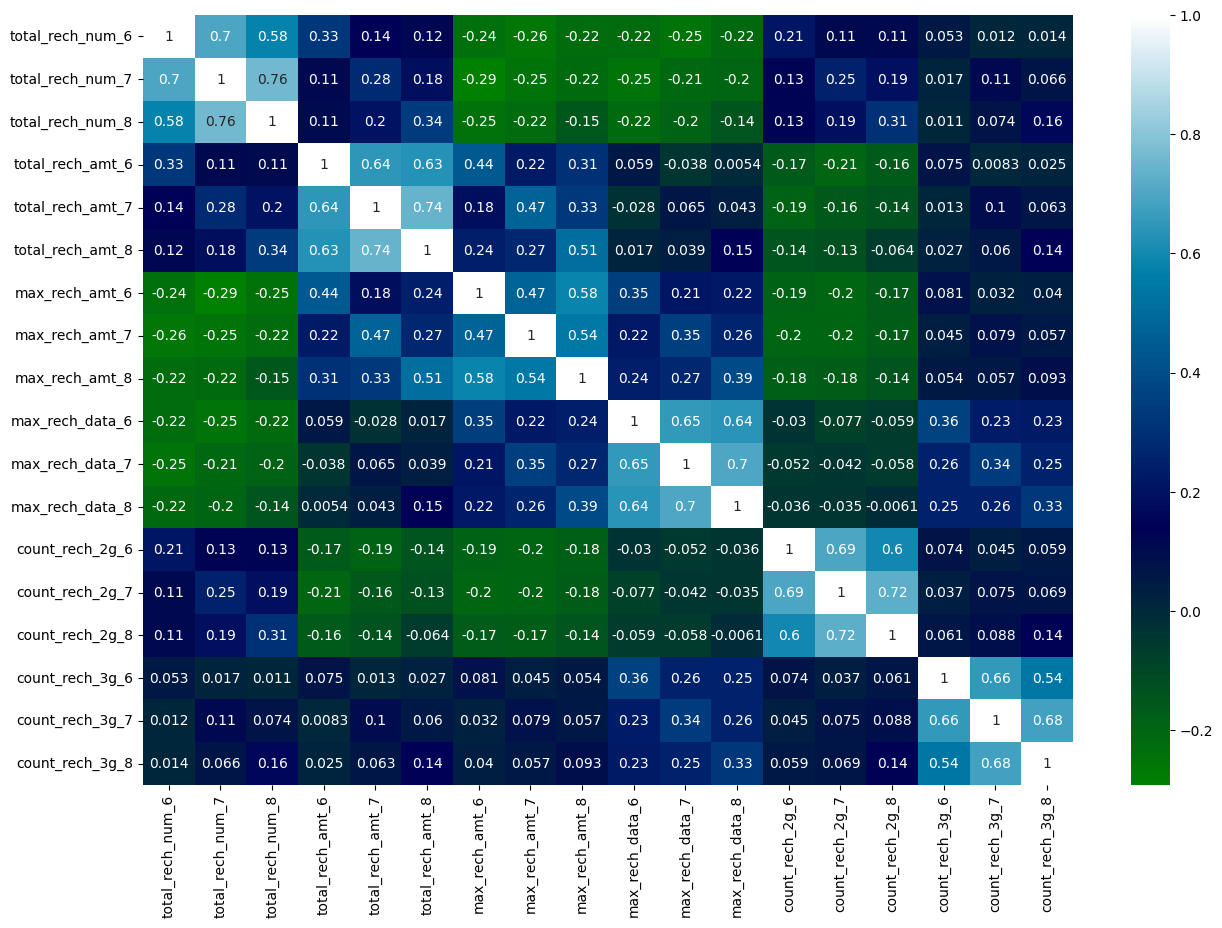

In [389]:
#rech_data
plt.figure(figsize=(15,10))
sns.heatmap(rech_data.corr(), annot=True, cmap='ocean')
plt.show()

Observations:

- There is a notable correlation between the average recharge amount and the recharge amount for both months 6 and 7.
- A significant correlation of 76% exists between the total recharge for month 7 and the recharge for month 8.
- Any factor correlated with month 8 is likely correlated with churn prediction.

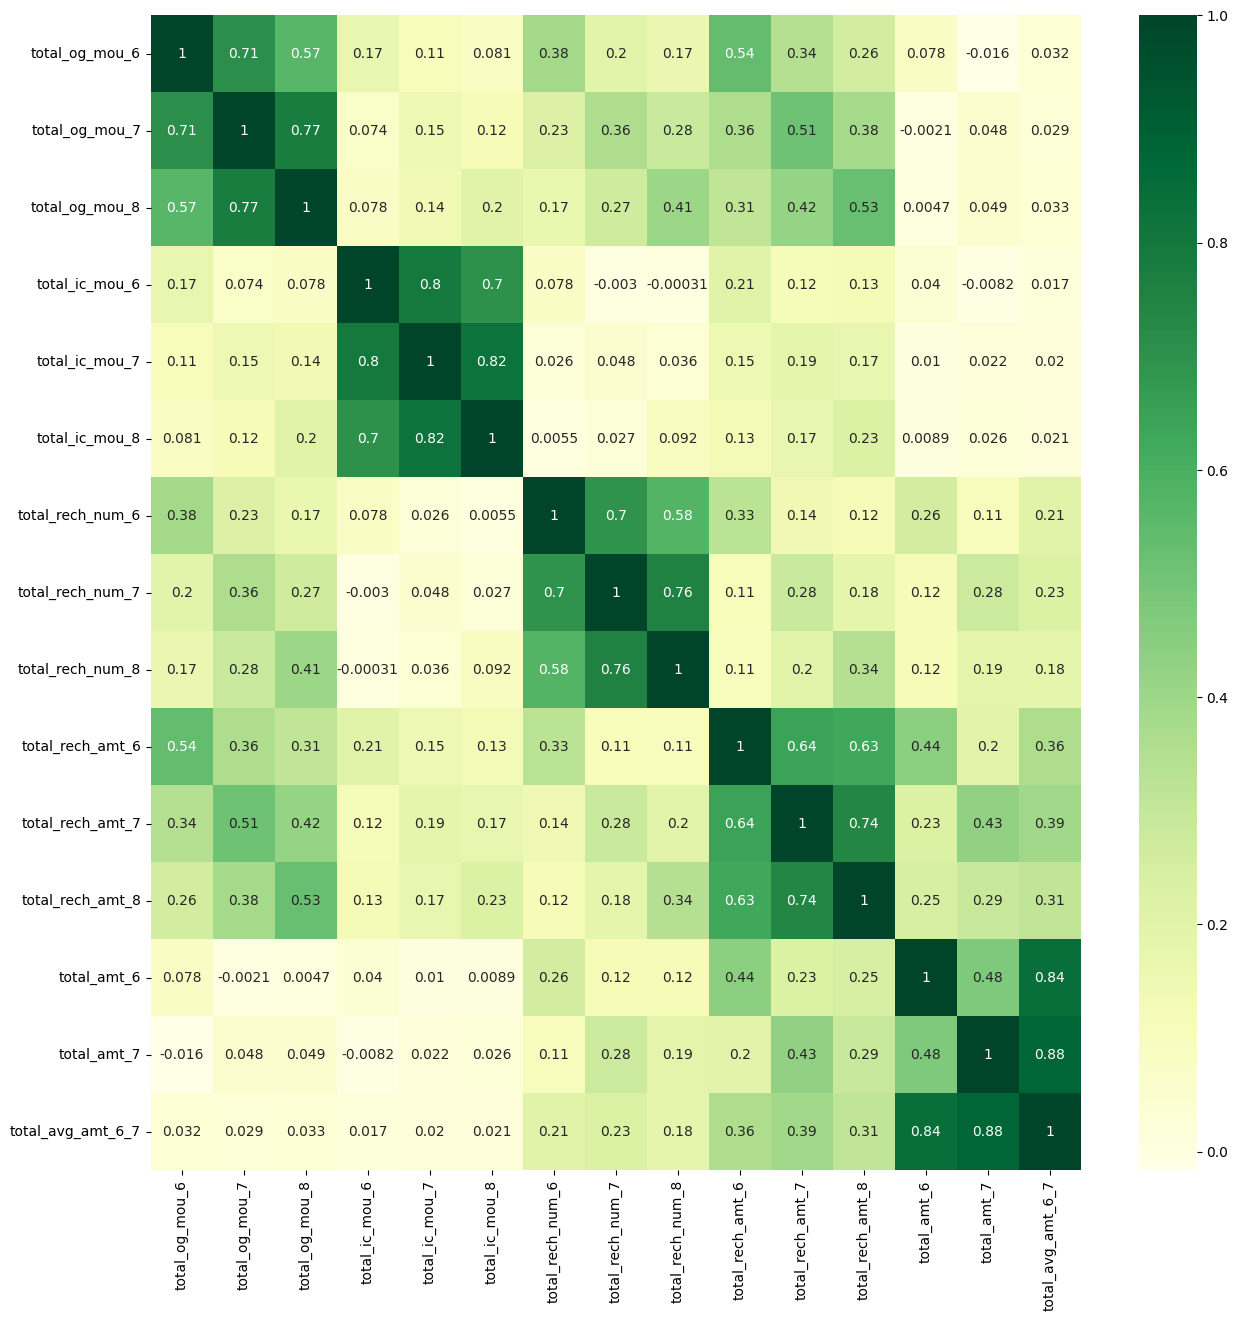

In [390]:
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='YlGn')
plt.show()

Observations:

- There exists a remarkably high correlation between the incoming (82%) and outgoing minutes (77%) of usage in months 7 and 8.
- Heavy usage suggests that customers are less likely to churn.

In [391]:
# Inspecting shape of the training dataset
final_df.shape

(20998, 149)

In [392]:
final_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_avg_amt_6_7
0,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,...,1.0,1.0,647,0.0,0.00,0.00,0,1515.0,1473.0,1494.0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,...,-1.0,1.0,602,0.0,0.00,0.00,0,808.0,400.0,604.0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,...,-1.0,-1.0,455,0.0,0.00,0.00,0,1420.0,990.0,1205.0
3,93.18,38.29,29.86,531.19,507.76,222.03,0.00,0.0,0.0,0.00,...,0.0,0.0,1219,0.0,0.00,0.00,0,463.0,519.0,491.0
4,8.58,11.48,12.68,133.16,158.73,182.83,0.00,0.0,0.0,0.00,...,1.0,1.0,573,700.4,185.71,173.72,0,1385.0,1180.0,1282.5


In [393]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20998 entries, 0 to 20997
Columns: 149 entries, onnet_mou_6 to total_avg_amt_6_7
dtypes: category(7), float64(117), int64(25)
memory usage: 22.9 MB


In [394]:
# Inspecting the shape of the test set
final_unseen_df.shape

(30000, 149)

In [395]:
final_unseen_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,...,-1.0,-1.0,-1.0,1692,0.00,0.00,0.00,103.0,90.0,96.5
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,...,-1.0,-1.0,-1.0,2533,0.00,0.00,0.00,500.0,500.0,500.0
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,...,-1.0,-1.0,-1.0,277,525.61,758.41,241.84,500.0,1000.0,750.0
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,...,-1.0,-1.0,-1.0,1244,0.00,0.00,0.00,110.0,260.0,185.0
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,...,-1.0,-1.0,-1.0,462,0.00,0.00,0.00,356.0,490.0,423.0


In [396]:
final_unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 149 entries, onnet_mou_6 to total_avg_amt_6_7
dtypes: category(6), float64(117), int64(26)
memory usage: 32.9 MB


## 5. Dummy Variable Creation (One Hot Encoding) - Training Set ##

In [397]:
 ##Creating dummies for categorical columns
dummy_df = pd.get_dummies(final_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')
final_df = pd.concat([final_df, dummy_df], axis=1)

In [398]:
# drop the category cols
final_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [399]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20998 entries, 0 to 20997
Columns: 155 entries, onnet_mou_6 to night_pck_user_6_1.0
dtypes: category(1), float64(117), int64(37)
memory usage: 24.7 MB


In [400]:
final_df.shape

(20998, 155)

## 6. Dummy Variable Creation (One Hot Encoding) - Test Set##

In [405]:
# Creating dummies for categorical columns
dummy_unseen_df = pd.get_dummies(final_unseen_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')

In [406]:
final_unseen_df = pd.concat([final_unseen_df, dummy_unseen_df], axis=1)

In [407]:
# drop the category cols
final_unseen_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [408]:
final_unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 167 entries, onnet_mou_6 to night_pck_user_6_1.0
dtypes: float64(117), int64(50)
memory usage: 38.2 MB


In [409]:
final_unseen_df.shape

(30000, 167)

## 7. Outlier Treatment ##

In [410]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000
mean,267.178107,272.109430,240.685531,382.267956,383.250630,344.876032,16.405591,13.039014,12.474249,27.934119,...,0.055624,0.476617,0.043433,0.523955,0.039670,0.516811,0.554339,0.013049,0.543290,0.013192
std,466.100504,486.527458,465.230834,480.519770,490.938657,476.342965,77.640328,77.874472,72.898547,120.392036,...,0.229200,0.499465,0.203834,0.499438,0.195188,0.499729,0.497050,0.113487,0.498134,0.114098
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.440000,17.940000,13.815000,79.540000,75.790000,58.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,90.235000,87.830000,72.685000,234.680000,228.825000,198.600000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,292.127500,290.620000,245.405000,495.280000,498.790000,444.155500,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
90%,766.325000,788.211000,672.592000,912.390000,922.828000,841.962000,28.202000,14.731000,15.916000,52.940000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
95%,1147.706000,1194.174500,1086.979500,1265.446000,1274.301500,1172.576500,86.367500,56.947500,56.103500,154.087500,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
99%,2164.456000,2239.353000,2153.499100,2338.036700,2394.084300,2178.008900,335.603500,283.862000,276.136000,546.030900,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [411]:
numerical_cols = list(final_df.select_dtypes(exclude='category'))
numerical_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

The outlier_handling method treats outliers and adjusts skewness in the dataset to improve data robustness and analysis accuracy.

In [412]:
# Handle outliers of numerical columns in the training set
final_df[numerical_cols] = final_df[numerical_cols].apply(outlier_handling)

In [413]:
# Inspecting the numerical columns again in the training set
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,...,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000
mean,4.211145,4.187538,3.998147,5.094089,5.069495,4.867763,0.714727,0.566272,0.595661,0.835724,...,0.083437,0.714925,0.065149,0.785932,0.059506,0.775217,0.831508,0.019573,0.814935,0.019788
std,2.016302,2.044539,2.066760,1.674879,1.700994,1.803707,1.516127,1.366641,1.367898,1.728675,...,0.343800,0.749197,0.305751,0.749157,0.292783,0.749594,0.745576,0.170230,0.747201,0.171147
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.017494,2.941276,2.695640,4.388754,4.341074,4.077537,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.513439,4.486724,4.299799,5.462475,5.437318,5.296315,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.500000,0.000000,1.500000,1.500000,0.000000,1.500000,0.000000
75%,5.680608,5.675452,5.506977,6.207140,6.214188,6.098424,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.500000,0.000000,1.500000,0.000000,1.500000,1.500000,0.000000,1.500000,0.000000
90%,6.642910,6.671034,6.512625,6.817163,6.828526,6.736922,3.374237,2.755631,2.828260,3.987872,...,0.000000,1.500000,0.000000,1.500000,0.000000,1.500000,1.500000,0.000000,1.500000,0.000000
95%,7.046391,7.086047,6.992078,7.143970,7.150938,7.067811,4.470123,4.059537,4.044865,5.043989,...,1.500000,1.500000,0.000000,1.500000,0.000000,1.500000,1.500000,0.000000,1.500000,0.000000
99%,7.680386,7.714389,7.675314,7.757494,7.781174,7.686625,5.818906,5.652004,5.624508,6.304505,...,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000


In [414]:
# Handle outliers of numerical columns in the test set
final_unseen_df[numerical_cols] = final_unseen_df[numerical_cols].apply(outlier_handling)

## 8. Model Building and Evaluation ##
 Train-Test Split
- Given the availability of the test.csv file for testing purposes, this train-test split will exclusively operate on the train.csv dataset. - It involves allocating 80% of the data for training and 20% for validation.

In [415]:
# Partitioning the dataset into the feature variable 'X' and the response variable 'y'.
X = final_df.drop(['churn_probability'], axis=1)
y = final_df['churn_probability']

In [416]:
X.shape

(20998, 154)

In [417]:
y.shape

(20998,)

In [418]:
X.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
0,3.103689,1.763017,1.964311,4.060271,3.666378,2.363680,4.000766,0.0,0.0,2.817204,...,0.0,1.5,0.0,1.5,0.0,1.5,1.5,0.0,1.5,0.0
1,2.436241,3.257712,5.275202,5.762397,5.837118,5.288721,0.000000,0.0,0.0,0.000000,...,0.0,1.5,0.0,0.0,0.0,1.5,0.0,0.0,1.5,0.0
2,6.757548,5.923480,0.636577,5.685143,6.111711,5.960773,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.545208,3.670970,3.429461,6.277001,6.231976,5.407306,0.000000,0.0,0.0,0.000000,...,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0,1.5,0.0
4,2.259678,2.524127,2.615935,4.899033,5.073485,5.214011,0.000000,0.0,0.0,0.000000,...,0.0,1.5,0.0,1.5,0.0,1.5,1.5,0.0,1.5,0.0


In [419]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: category
Categories (2, int64): [0, 1]

In [426]:
# Train test split - 80% training data, 20% validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)

In [427]:
# Checking the shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_val Shape:', X_val.shape)
print('y_val Shape:', y_val.shape)

X_train Shape: (16798, 154)
y_train Shape: (16798,)
X_val Shape: (4200, 154)
y_val Shape: (4200,)


In [428]:
y_train.value_counts()

churn_probability
0    15400
1     1398
Name: count, dtype: int64

## 8.1. Handling Data Imbalance using Synthetic Minority Over-sampling Technique (SMOTE) ##





In [435]:
smt = SMOTE(random_state=2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)


In [436]:
X_train_smote.shape


(30800, 154)

In [437]:
y_train_smote.shape


(30800,)

<Axes: title={'center': 'Distribution of churn (imbalanced)'}, xlabel='churn_probability', ylabel='count'>

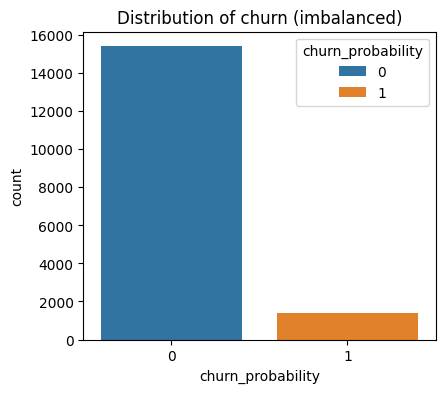

In [438]:
# Checking the distribution on our target variable 'y_train' before and after SMOTE
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Distribution of churn (imbalanced)")
sns.countplot(x=y_train, hue=y_train)


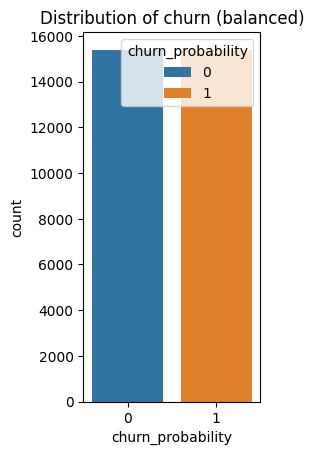

In [439]:
plt.subplot(1,2,2)
plt.title("Distribution of churn (balanced)")
sns.countplot(x=y_train_smote, hue=y_train_smote)

plt.subplots_adjust(wspace=0.8)
plt.show()

## 8.2. Feature Scaling using SandardScaler - Training Set ##

In [456]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns = X_train_smote.columns, index = X_train_smote.index)

# Only Transform validation set
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index = X_val.index)

In [457]:
X_train_scaled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
0,0.149095,0.096308,0.612510,-0.131921,-0.127237,0.241261,2.442333,-0.530509,2.266093,2.179345,...,-0.246405,1.498577,-0.209151,-0.882333,-0.208259,1.083555,-0.936624,-0.109314,1.043735,-0.133862
1,-0.011493,0.097476,0.221889,-0.168737,-0.384978,0.112302,0.953740,-0.530509,1.403829,1.516742,...,-0.246405,-0.683643,-0.209151,-0.882333,-0.208259,-0.946637,-0.936624,-0.109314,-0.998620,-0.133862
2,1.347327,1.161152,1.273531,-0.123085,-0.561953,-0.429037,-0.527309,-0.530509,-0.665387,-0.547857,...,-0.246405,-0.683643,-0.209151,-0.882333,-0.208259,-0.946637,-0.936624,-0.109314,-0.998620,-0.133862
3,0.575346,0.440481,0.779008,1.168977,1.270920,1.305695,-0.527309,-0.530509,-0.665387,-0.547857,...,-0.246405,1.498577,-0.209151,1.162058,-0.208259,1.083555,1.104365,-0.109314,1.043735,-0.133862
4,1.177188,1.567876,1.767948,0.643098,-0.114267,0.279907,-0.527309,-0.530509,-0.665387,-0.547857,...,-0.246405,1.498577,-0.209151,1.162058,-0.208259,1.083555,-0.936624,10.125927,-0.998620,8.908799


## 8.3. Feature Scaling using SandardScaler - Unseen Test Set ##

In [458]:
final_unseen_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,...,fb_user_8_0.0,fb_user_8_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_6_0.0,fb_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0
id,,,,,,,,,,,,,,,,,,,,,
69999,3.489819,3.055415,3.182627,4.113493,3.501344,3.578786,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70000,4.337421,3.742657,3.036874,6.164030,6.434290,5.981263,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70001,2.144761,2.181547,2.240710,2.889260,3.846097,3.829511,3.170106,4.648038,3.298795,3.239854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70002,1.842136,1.150572,0.000000,3.714547,5.327925,3.219276,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70003,6.113527,6.413508,6.553477,4.126166,3.212455,4.319619,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model 1. Logistic Regression with Recursive Feature Elimination (RFE) ##

In [ ]:
%%time
# Select top 20 features using RFE
logreg = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_scaled, y_train_smote)

In [ ]:

list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_))

In [ ]:
# Selected features using RFE
selected_features = X_train_scaled.columns[rfe.support_]
selected_features

In [ ]:
X_train_scaled_final = X_train_scaled[selected_features]
logreg.fit(X_train_scaled_final, y_train_smote)

In [ ]:
y_train_smote_pred = logreg.predict(X_train_scaled_final)

In [ ]:
# Calculate metrics on the training set
calculate_classification_metrics(y_train_smote, y_train_smote_pred)

In [ ]:
# Retain only the selected feature from the final model
X_val_scaled_final = X_val_scaled[selected_features]
X_val_scaled_final.head()

In [ ]:
# Get the predicted values from the linear model
y_val_pred = logreg.predict(X_val_scaled_final)

In [ ]:
confusion = confusion_matrix(y_true=y_val, y_pred=y_val_pred)
print(confusion)

In [ ]:
# Calculate metrics
metrics_df = calculate_classification_metrics(y_true=y_val, y_pred=y_val_pred)
metrics_df

In [ ]:
Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
cm_array = np.array(confusion).reshape(2,2)

# Create the heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, cmap='Oranges', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

In [ ]:
# ROC AUC Score
"{:2.2f}".format(roc_auc_score(y_val, y_val_pred))

In [ ]:
## Model 2. Logistic Regression with PCA and Hyperparameter Tuning ##

In [ ]:
pca = PCA()

In [ ]:
pca_components = pca.fit_transform(X_train)
pca_components

In [ ]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()